Some quick visualizations of the model output

In [3]:
#high level modules
import os
import sys
import imp
import numpy as np
import pandas as pd
import pickle

# ml/ai modules
import tensorflow as tf
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
# import pydot
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.colors as colors

# custom modules
this_dir = "/Users/steeleb/Documents/GitHub/ATS-ML-Fall2023/"
imp.load_source("tvt", os.path.join(this_dir, "02_preprocessing_updated.py"))
from tvt import train1, val1, train2, val2, train3, val3, train4, val4, train5, val5, train6, val6, train7, val7, train8, val8, train9, val9
from tvt import train1_ts, val1_ts, train2_ts, val2_ts, train3_ts, val3_ts, train4_ts, val4_ts
imp.load_source("universals", os.path.join(this_dir, "universal_functions.py"))
from universals import load_pickle_file, get_features_labels, predict_values, print_error_metrics
imp.load_source("vis", os.path.join(this_dir, "NeuralNetworks/vis_functions.py"))
from vis import create_scatter_plot

Load in models from pickle files

In [4]:
# model directory path
model_dir = '/Users/steeleb/OneDrive - Colostate/NASA-Northern/data/NN_train_val_test/regional_daily_temp/models/basic_leaky_updated/'

histories = [f for f in os.listdir(model_dir) if 'history' in f]

ts_histories = [f for f in histories if 'ts' in f]
ts_histories.sort()

histories = [f for f in histories if 'ts' not in f]
histories.sort()

ts_history_1 = load_pickle_file(ts_histories[0], model_dir)
ts_history_2 = load_pickle_file(ts_histories[1], model_dir)
ts_history_3 = load_pickle_file(ts_histories[2], model_dir)
ts_history_4 = load_pickle_file(ts_histories[3], model_dir)

history_1 = load_pickle_file(histories[0], model_dir)
history_2 = load_pickle_file(histories[1], model_dir)
history_3 = load_pickle_file(histories[2], model_dir)
history_4 = load_pickle_file(histories[3], model_dir)
history_5 = load_pickle_file(histories[4], model_dir)
history_6 = load_pickle_file(histories[5], model_dir)
history_7 = load_pickle_file(histories[6], model_dir)
history_8 = load_pickle_file(histories[7], model_dir)
history_9 = load_pickle_file(histories[8], model_dir)


Metal device set to: Apple M2 Max

systemMemory: 64.00 GB
maxCacheSize: 24.00 GB



2024-10-18 16:43:04.100637: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-10-18 16:43:04.100781: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


And now we'll look at the training and validation loss and accuracy for each model

Text(0.5, 0.98, 'LOO dataset 1')

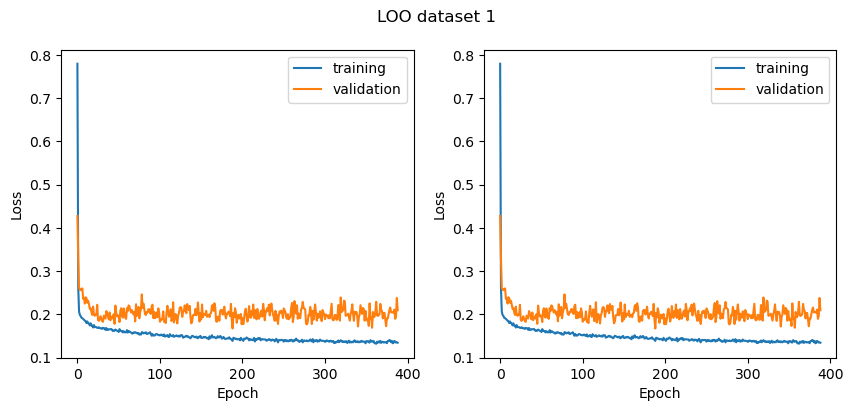

In [5]:
fig1, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].plot(history_1.history["loss"], label="training")
axs[0].plot(history_1.history["val_loss"], label="validation")
axs[0].set_xlabel("Epoch")
axs[0].set_ylabel("Loss")
axs[0].legend()

axs[1].plot(history_1.history["loss"], label="training")
axs[1].plot(history_1.history["val_loss"], label="validation")
axs[1].set_xlabel("Epoch")
axs[1].set_ylabel("Loss")
axs[1].legend()

fig1.suptitle("LOO dataset 1")


Text(0.5, 0.98, 'LOO dataset 2')

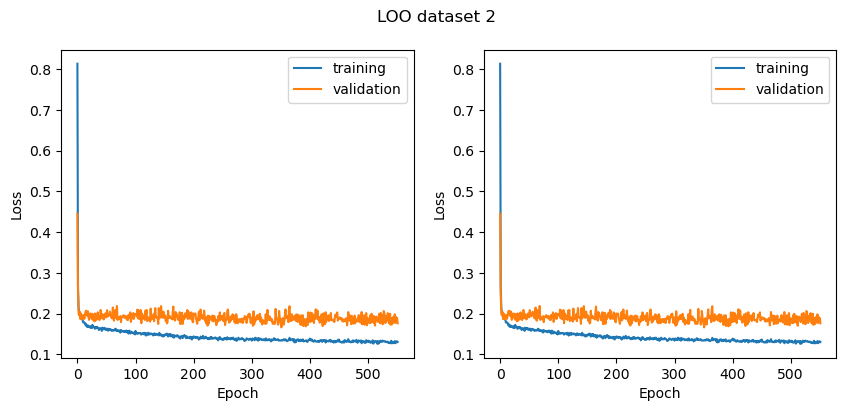

In [6]:
fig2, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].plot(history_2.history["loss"], label="training")
axs[0].plot(history_2.history["val_loss"], label="validation")
axs[0].set_xlabel("Epoch")
axs[0].set_ylabel("Loss")
axs[0].legend()

axs[1].plot(history_2.history["loss"], label="training")
axs[1].plot(history_2.history["val_loss"], label="validation")
axs[1].set_xlabel("Epoch")
axs[1].set_ylabel("Loss")
axs[1].legend()

fig2.suptitle("LOO dataset 2")

Text(0.5, 0.98, 'LOO dataset 3')

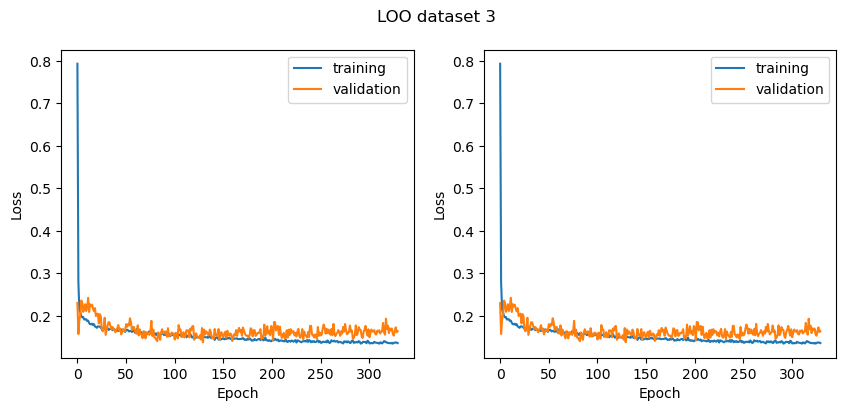

In [7]:
fig3, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].plot(history_3.history["loss"], label="training")
axs[0].plot(history_3.history["val_loss"], label="validation")
axs[0].set_xlabel("Epoch")
axs[0].set_ylabel("Loss")
axs[0].legend()

axs[1].plot(history_3.history["loss"], label="training")
axs[1].plot(history_3.history["val_loss"], label="validation")
axs[1].set_xlabel("Epoch")
axs[1].set_ylabel("Loss")
axs[1].legend()

fig3.suptitle("LOO dataset 3")

Text(0.5, 0.98, 'LOO dataset 4')

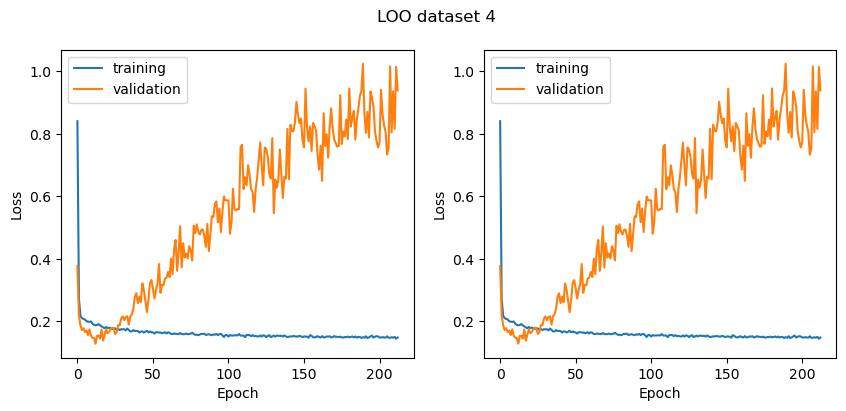

In [8]:
fig4, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].plot(history_4.history["loss"], label="training")
axs[0].plot(history_4.history["val_loss"], label="validation")
axs[0].set_xlabel("Epoch")
axs[0].set_ylabel("Loss")
axs[0].legend()

axs[1].plot(history_4.history["loss"], label="training")
axs[1].plot(history_4.history["val_loss"], label="validation")
axs[1].set_xlabel("Epoch")
axs[1].set_ylabel("Loss")
axs[1].legend()

fig4.suptitle("LOO dataset 4")

Text(0.5, 0.98, 'LOO dataset 5')

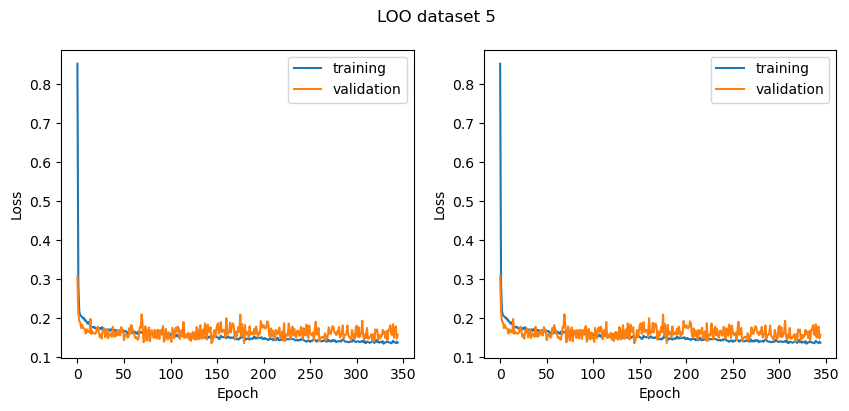

In [9]:
fig5, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].plot(history_5.history["loss"], label="training")
axs[0].plot(history_5.history["val_loss"], label="validation")
axs[0].set_xlabel("Epoch")
axs[0].set_ylabel("Loss")
axs[0].legend()

axs[1].plot(history_5.history["loss"], label="training")
axs[1].plot(history_5.history["val_loss"], label="validation")
axs[1].set_xlabel("Epoch")
axs[1].set_ylabel("Loss")
axs[1].legend()

fig5.suptitle("LOO dataset 5")


Text(0.5, 0.98, 'LOO dataset 6')

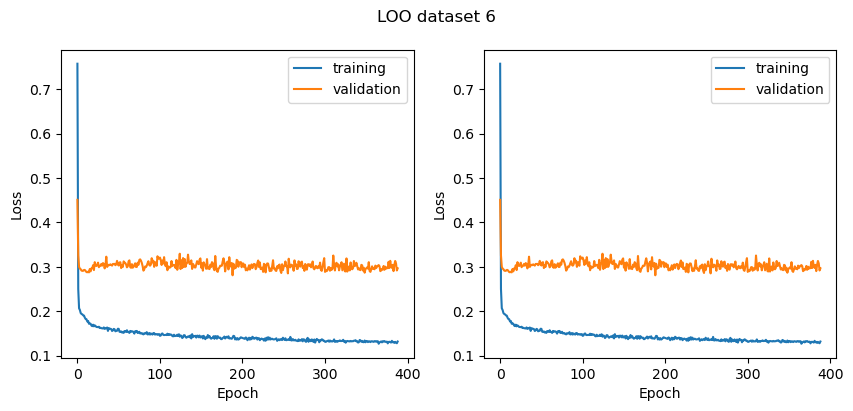

In [10]:
fig6, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].plot(history_6.history["loss"], label="training")
axs[0].plot(history_6.history["val_loss"], label="validation")
axs[0].set_xlabel("Epoch")
axs[0].set_ylabel("Loss")
axs[0].legend()

axs[1].plot(history_6.history["loss"], label="training")
axs[1].plot(history_6.history["val_loss"], label="validation")
axs[1].set_xlabel("Epoch")
axs[1].set_ylabel("Loss")
axs[1].legend()

fig6.suptitle("LOO dataset 6")


Text(0.5, 0.98, 'LOO dataset 7')

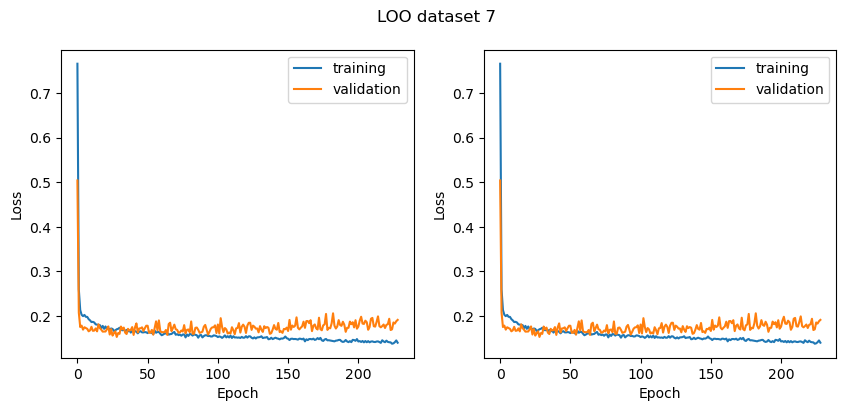

In [11]:
fig7, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].plot(history_7.history["loss"], label="training")
axs[0].plot(history_7.history["val_loss"], label="validation")
axs[0].set_xlabel("Epoch")
axs[0].set_ylabel("Loss")
axs[0].legend()

axs[1].plot(history_7.history["loss"], label="training")
axs[1].plot(history_7.history["val_loss"], label="validation")
axs[1].set_xlabel("Epoch")
axs[1].set_ylabel("Loss")
axs[1].legend()

fig7.suptitle("LOO dataset 7")

Text(0.5, 0.98, 'LOO dataset 8')

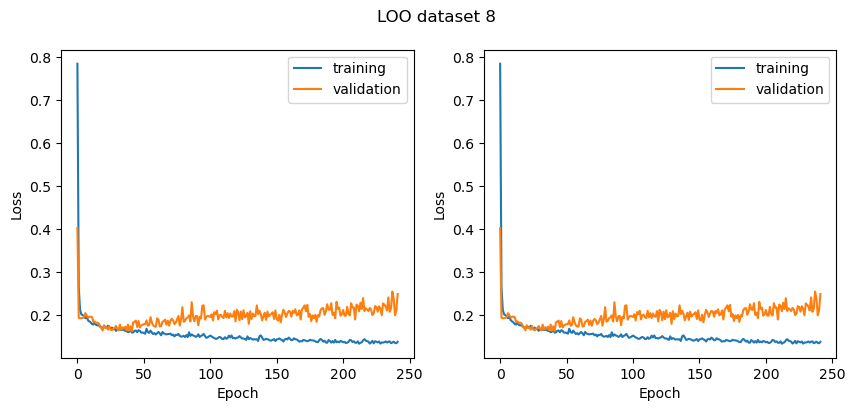

In [12]:
fig8, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].plot(history_8.history["loss"], label="training")
axs[0].plot(history_8.history["val_loss"], label="validation")
axs[0].set_xlabel("Epoch")
axs[0].set_ylabel("Loss")
axs[0].legend()

axs[1].plot(history_8.history["loss"], label="training")
axs[1].plot(history_8.history["val_loss"], label="validation")
axs[1].set_xlabel("Epoch")
axs[1].set_ylabel("Loss")
axs[1].legend()

fig8.suptitle("LOO dataset 8")

Text(0.5, 0.98, 'LOO dataset 9')

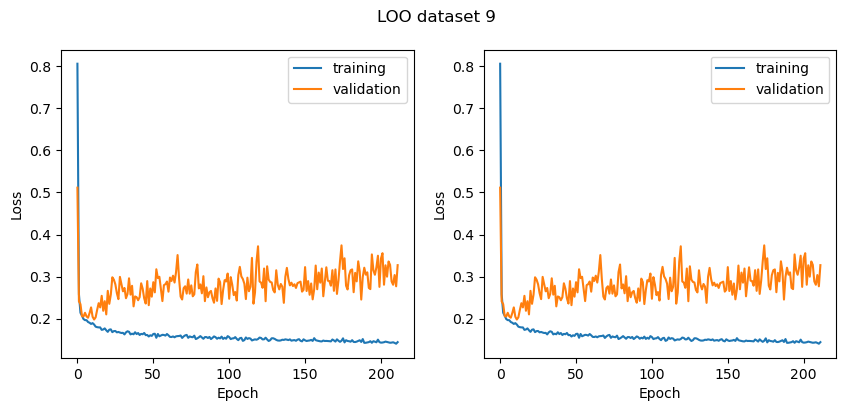

In [13]:
fig9, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].plot(history_9.history["loss"], label="training")
axs[0].plot(history_9.history["val_loss"], label="validation")
axs[0].set_xlabel("Epoch")
axs[0].set_ylabel("Loss")
axs[0].legend()

axs[1].plot(history_9.history["loss"], label="training")
axs[1].plot(history_9.history["val_loss"], label="validation")
axs[1].set_xlabel("Epoch")
axs[1].set_ylabel("Loss")
axs[1].legend()

fig9.suptitle("LOO dataset 9")


Text(0.5, 0.98, 'TS dataset 1')

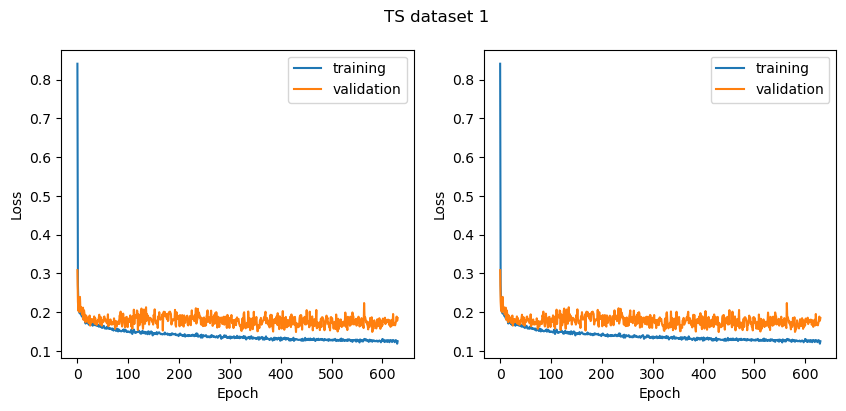

In [14]:
fig1ts, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].plot(ts_history_1.history["loss"], label="training")
axs[0].plot(ts_history_1.history["val_loss"], label="validation")
axs[0].set_xlabel("Epoch")
axs[0].set_ylabel("Loss")
axs[0].legend()

axs[1].plot(ts_history_1.history["loss"], label="training")
axs[1].plot(ts_history_1.history["val_loss"], label="validation")
axs[1].set_xlabel("Epoch")
axs[1].set_ylabel("Loss")
axs[1].legend()

fig1ts.suptitle("TS dataset 1")


Text(0.5, 0.98, 'TS dataset 2')

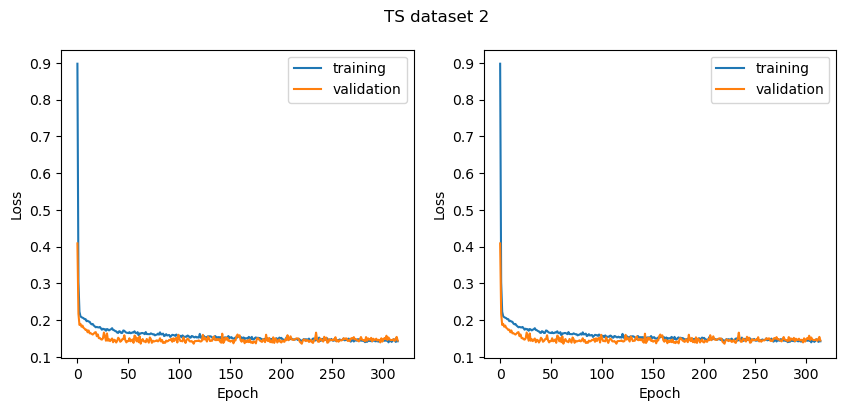

In [15]:
fig2ts, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].plot(ts_history_2.history["loss"], label="training")
axs[0].plot(ts_history_2.history["val_loss"], label="validation")
axs[0].set_xlabel("Epoch")
axs[0].set_ylabel("Loss")
axs[0].legend()

axs[1].plot(ts_history_2.history["loss"], label="training")
axs[1].plot(ts_history_2.history["val_loss"], label="validation")
axs[1].set_xlabel("Epoch")
axs[1].set_ylabel("Loss")
axs[1].legend()

fig2ts.suptitle("TS dataset 2")

Text(0.5, 0.98, 'TS dataset 3')

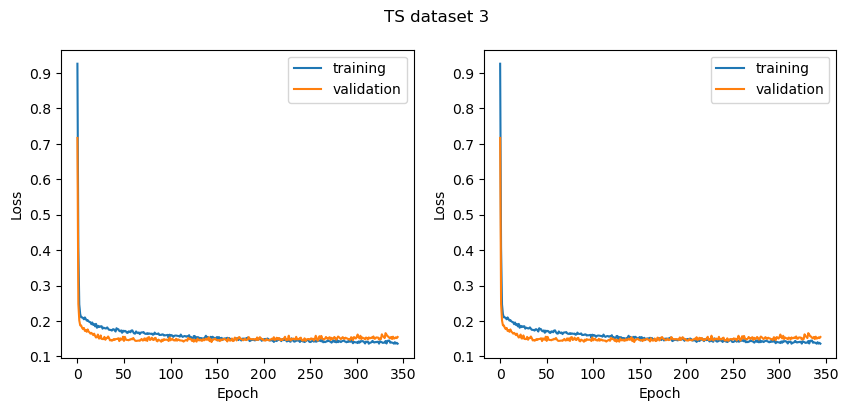

In [16]:
fig3ts, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].plot(ts_history_3.history["loss"], label="training")
axs[0].plot(ts_history_3.history["val_loss"], label="validation")
axs[0].set_xlabel("Epoch")
axs[0].set_ylabel("Loss")
axs[0].legend()

axs[1].plot(ts_history_3.history["loss"], label="training")
axs[1].plot(ts_history_3.history["val_loss"], label="validation")
axs[1].set_xlabel("Epoch")
axs[1].set_ylabel("Loss")
axs[1].legend()

fig3ts.suptitle("TS dataset 3")

Text(0.5, 0.98, 'TS dataset 4')

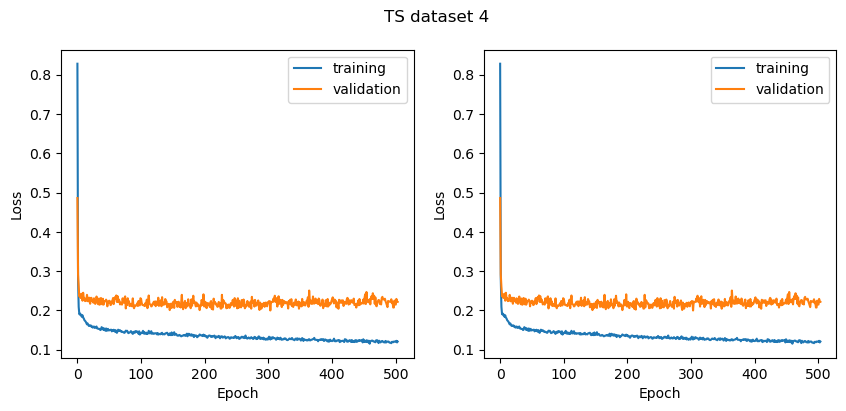

In [17]:
fig4ts, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].plot(ts_history_4.history["loss"], label="training")
axs[0].plot(ts_history_4.history["val_loss"], label="validation")
axs[0].set_xlabel("Epoch")
axs[0].set_ylabel("Loss")
axs[0].legend()

axs[1].plot(ts_history_4.history["loss"], label="training")
axs[1].plot(ts_history_4.history["val_loss"], label="validation")
axs[1].set_xlabel("Epoch")
axs[1].set_ylabel("Loss")
axs[1].legend()

fig4ts.suptitle("TS dataset 4")

Import data, models and look at actual values

In [18]:
features1, labels_1, val_features1, val_labels_1 = get_features_labels(train1, val1)
features2, labels_2, val_features2, val_labels_2 = get_features_labels(train2, val2)
features3, labels_3, val_features3, val_labels_3 = get_features_labels(train3, val3)
features4, labels_4, val_features4, val_labels_4 = get_features_labels(train4, val4)
features5, labels_5, val_features5, val_labels_5 = get_features_labels(train5, val5)
features6, labels_6, val_features6, val_labels_6 = get_features_labels(train6, val6)
features7, labels_7, val_features7, val_labels_7 = get_features_labels(train7, val7)
features8, labels_8, val_features8, val_labels_8 = get_features_labels(train8, val8)
features9, labels_9, val_features9, val_labels_9 = get_features_labels(train9, val9)

ts_features1, ts_labels_1, ts_val_features1, ts_val_labels_1 = get_features_labels(train1_ts, val1_ts)
ts_features2, ts_labels_2, ts_val_features2, ts_val_labels_2 = get_features_labels(train2_ts, val2_ts)
ts_features3, ts_labels_3, ts_val_features3, ts_val_labels_3 = get_features_labels(train3_ts, val3_ts)
ts_features4, ts_labels_4, ts_val_features4, ts_val_labels_4 = get_features_labels(train4_ts, val4_ts)


In [19]:
models = [f for f in os.listdir(model_dir) if 'history' not in f]

ts_models = [f for f in models if 'ts' in f]
ts_models.sort()

models = [f for f in models if 'ts' not in f]
models.sort()

ts_model_1 = load_pickle_file(ts_models[0], model_dir)
ts_model_2 = load_pickle_file(ts_models[1], model_dir)
ts_model_3 = load_pickle_file(ts_models[2], model_dir)
ts_model_4 = load_pickle_file(ts_models[3], model_dir)

model_1 = load_pickle_file(models[0], model_dir)
model_2 = load_pickle_file(models[1], model_dir)
model_3 = load_pickle_file(models[2], model_dir)
model_4 = load_pickle_file(models[3], model_dir)
model_5 = load_pickle_file(models[4], model_dir)
model_6 = load_pickle_file(models[5], model_dir)
model_7 = load_pickle_file(models[6], model_dir)
model_8 = load_pickle_file(models[7], model_dir)
model_9 = load_pickle_file(models[8], model_dir)


In [20]:
features1

,area,shoreline_length,max_depth,max_temp_degC_1,mean_temp_degC_1,min_temp_degC_1,tot_sol_rad_Wpm2_1,max_temp_degC_3,mean_temp_degC_3,min_temp_degC_3,...,max_wind_mps_1,min_wind_mps_3,mean_wind_mps_3,max_wind_mps_3,min_wind_mps_5,mean_wind_mps_5,max_wind_mps_5,min_wind_mps_10,mean_wind_mps_10,max_wind_mps_10
0,-0.004720,0.844090,0.066911,0.125373,0.332014,0.403943,0.615311,-0.119172,0.167212,-0.252063,...,-0.880344,0.071631,-0.443270,-0.832831,0.213550,-0.333035,-0.699079,-0.012896,-0.458533,-0.549349
1,-0.806271,-0.842896,-0.981515,-0.487420,-0.420810,-0.456638,0.735071,-0.793585,-0.563993,-0.741311,...,-1.437710,-0.118333,-0.454544,-0.849103,-0.134172,-0.402020,-0.791855,-0.120034,-0.380623,-0.311436
2,-0.004720,0.844090,0.066911,0.541197,0.558658,0.259948,1.014655,0.304478,0.272878,0.255124,...,-0.622138,-0.890361,-1.145900,-1.048158,-0.848558,-0.518517,-0.432449,-0.998146,-0.304200,0.056033
3,-0.365779,-0.252451,-0.068370,-0.081809,-0.004587,-0.278762,1.525300,-0.262465,-0.050250,-0.023747,...,-0.047020,-0.754788,-0.869690,-0.942452,-0.707894,-0.629874,-0.139489,-1.008645,-1.058847,-0.932328
5,2.597794,2.109329,0.208956,-1.177541,-1.143889,-1.252845,1.544943,-1.326263,-1.126844,-0.961472,...,2.001002,0.653484,1.977621,2.358986,0.934674,2.269564,2.833140,1.244503,1.965329,2.392232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4094,-0.558344,-0.927245,-1.096504,0.494508,0.101970,-0.202530,-1.361383,0.254637,-0.621014,-1.098461,...,-0.819946,1.145139,0.937264,0.605329,0.911815,1.447393,1.315343,0.634451,1.557733,1.534489
4095,2.597794,2.109329,0.208956,-1.454757,-1.418386,-1.222352,-1.370078,-1.690726,-1.656148,-1.850272,...,-0.171640,0.917227,-0.070221,-0.352606,1.657812,0.844221,0.333951,1.451111,1.682973,1.569764
4096,-0.749465,-0.674198,-0.447156,-1.413904,-1.369749,-1.151202,-1.457212,-1.662690,-1.604571,-1.840487,...,-0.278267,0.754971,-0.353519,-0.764934,1.175646,0.321791,-0.131558,1.052552,0.948741,0.841687
4097,-0.247352,-0.589848,-1.123560,-2.257224,-2.092567,-1.733958,-1.995970,-1.567681,-1.711891,-1.424627,...,1.769263,1.329633,1.034405,0.840544,1.697270,1.139458,0.741350,1.997396,1.238341,0.751721


In [23]:
transform = pd.read_csv('/Users/steeleb/OneDrive - Colostate/NASA-Northern/data/NN_train_val_test/regional_daily_temp/mean_std_training_v2024-10-18.csv')
transform.set_index(transform.columns[0], inplace=True)

t_mean = transform.loc['value']['mean']
t_std = transform.loc['value']['std']

# Call predict_values for each dataset
p_act_1, l_act_1, p_v_act_1, l_v_act_1 = predict_values(model_1, features1, val_features1, labels_1, val_labels_1, t_mean, t_std)
p_act_2, l_act_2, p_v_act_2, l_v_act_2 = predict_values(model_2, features2, val_features2, labels_2, val_labels_2, t_mean, t_std)
p_act_3, l_act_3, p_v_act_3, l_v_act_3 = predict_values(model_3, features3, val_features3, labels_3, val_labels_3, t_mean, t_std)
p_act_4, l_act_4, p_v_act_4, l_v_act_4 = predict_values(model_4, features4, val_features4, labels_4, val_labels_4, t_mean, t_std)
p_act_5, l_act_5, p_v_act_5, l_v_act_5 = predict_values(model_5, features5, val_features5, labels_5, val_labels_5, t_mean, t_std)
p_act_6, l_act_6, p_v_act_6, l_v_act_6 = predict_values(model_6, features6, val_features6, labels_6, val_labels_6, t_mean, t_std)
p_act_7, l_act_7, p_v_act_7, l_v_act_7 = predict_values(model_7, features7, val_features7, labels_7, val_labels_7, t_mean, t_std)
p_act_8, l_act_8, p_v_act_8, l_v_act_8 = predict_values(model_8, features8, val_features8, labels_8, val_labels_8, t_mean, t_std)
p_act_9, l_act_9, p_v_act_9, l_v_act_9 = predict_values(model_9, features9, val_features9, labels_9, val_labels_9, t_mean, t_std)

p_act_1_ts, l_act_1_ts, p_v_act_1_ts, l_v_act_1_ts = predict_values(ts_model_1, ts_features1, ts_val_features1, ts_labels_1, ts_val_labels_1, t_mean, t_std)
p_act_2_ts, l_act_2_ts, p_v_act_2_ts, l_v_act_2_ts = predict_values(ts_model_2, ts_features2, ts_val_features2, ts_labels_2, ts_val_labels_2, t_mean, t_std)
p_act_3_ts, l_act_3_ts, p_v_act_3_ts, l_v_act_3_ts = predict_values(ts_model_3, ts_features3, ts_val_features3, ts_labels_3, ts_val_labels_3, t_mean, t_std)
p_act_4_ts, l_act_4_ts, p_v_act_4_ts, l_v_act_4_ts = predict_values(ts_model_4, ts_features4, ts_val_features4, ts_labels_4, ts_val_labels_4, t_mean, t_std)


2024-10-18 16:44:50.405989: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2024-10-18 16:44:50.437652: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


 80/107 [=====================>........] - ETA: 0s

2024-10-18 16:44:51.716281: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


 82/115 [====================>.........] - ETA: 0s

2024-10-18 16:44:52.640387: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


113/113 [==============================] - 0s 1ms/step


2024-10-18 16:44:53.645128: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


107/107 [==============================] - 0s 1ms/step


2024-10-18 16:44:54.576241: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


104/123 [========================>.....] - ETA: 0s

2024-10-18 16:44:55.487420: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/6 [====>.........................] - ETA: 0s

2024-10-18 16:44:55.771346: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


121/121 [==============================] - 0s 1ms/step


2024-10-18 16:44:56.480033: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


111/111 [==============================] - 0s 1ms/step


2024-10-18 16:44:56.811784: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


 85/119 [====================>.........] - ETA: 0s

2024-10-18 16:44:57.096970: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


112/112 [==============================] - 0s 1ms/step


2024-10-18 16:44:57.992100: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


91/96 [===========================>..] - ETA: 0s

2024-10-18 16:44:58.296228: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


42/78 [===============>..............] - ETA: 0s

2024-10-18 16:44:59.146880: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


 89/101 [=========================>....] - ETA: 0s

2024-10-18 16:45:00.017127: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


28/28 [==============================] - 0s 2ms/step


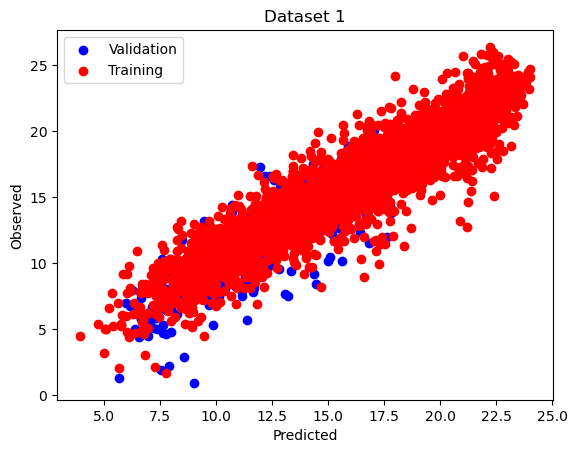

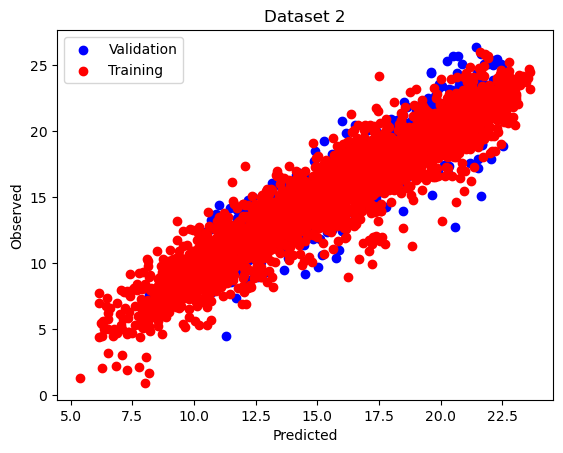

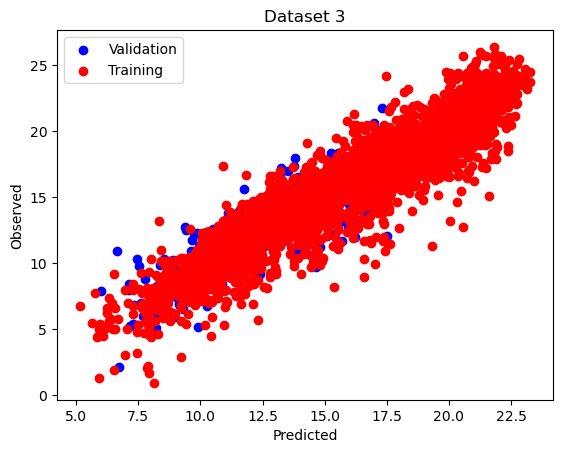

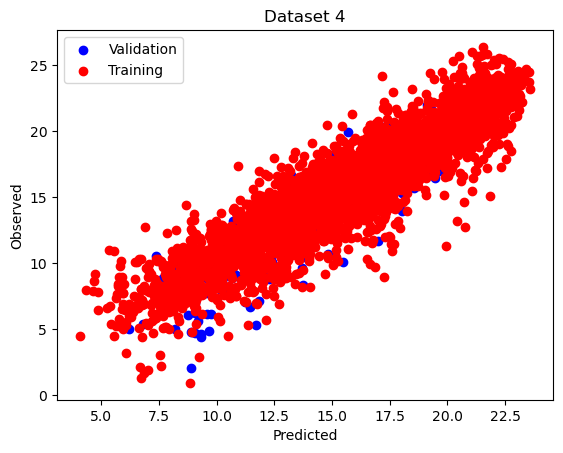

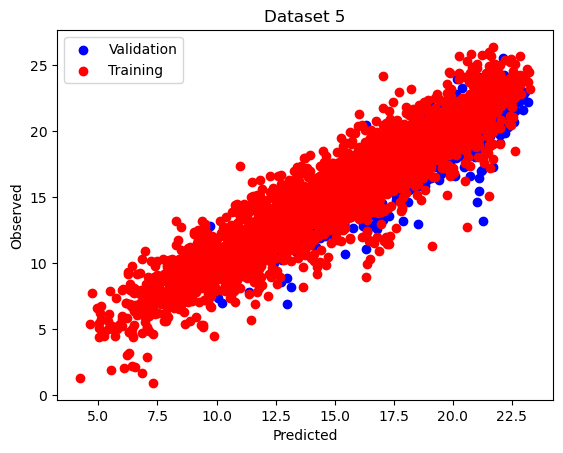

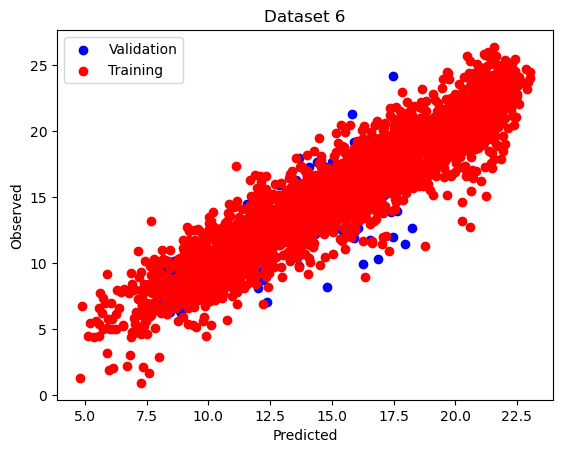

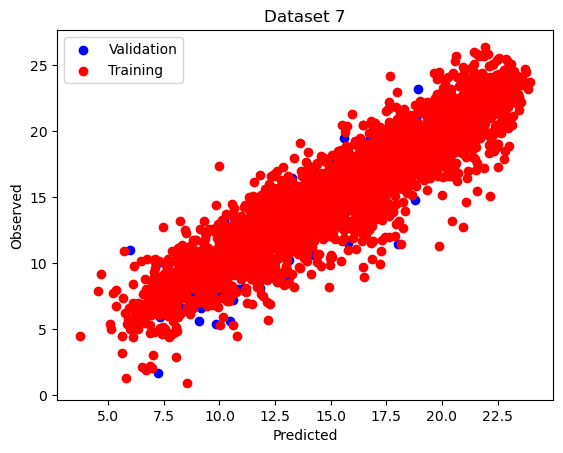

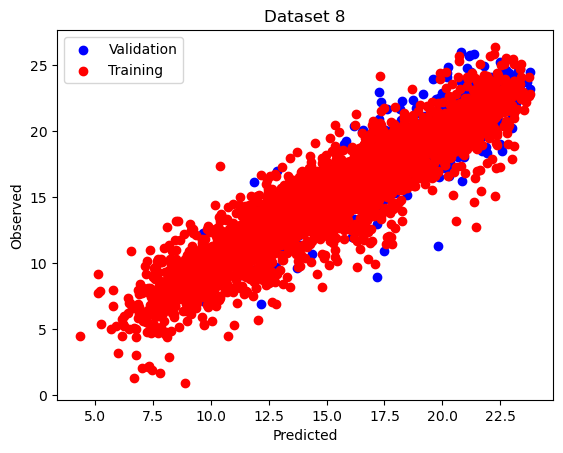

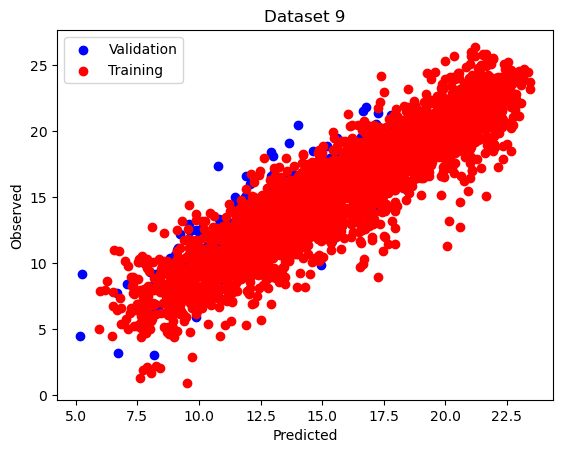

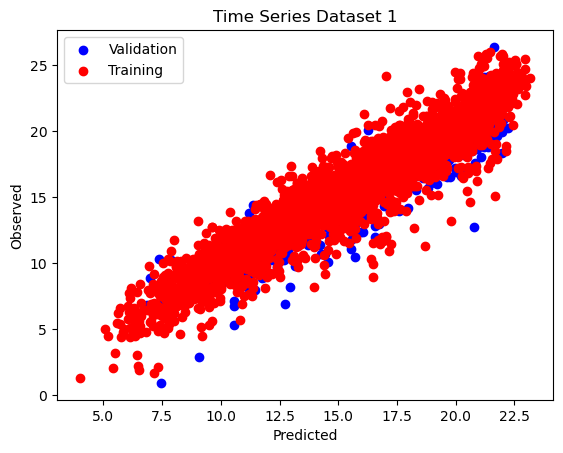

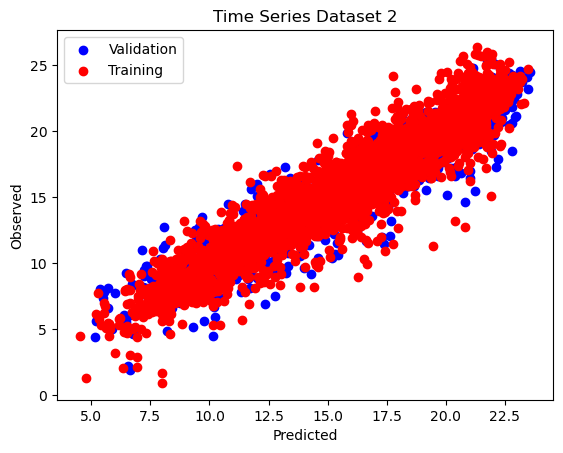

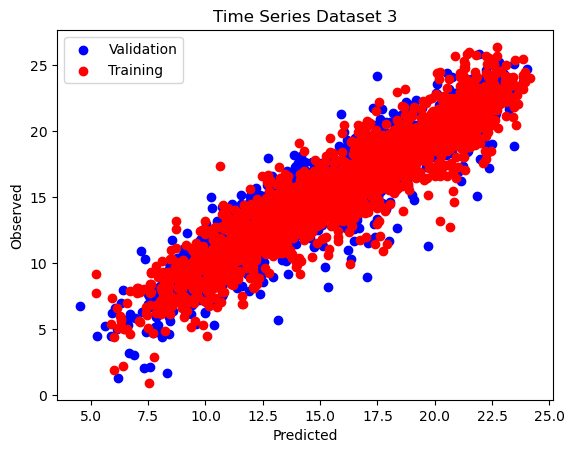

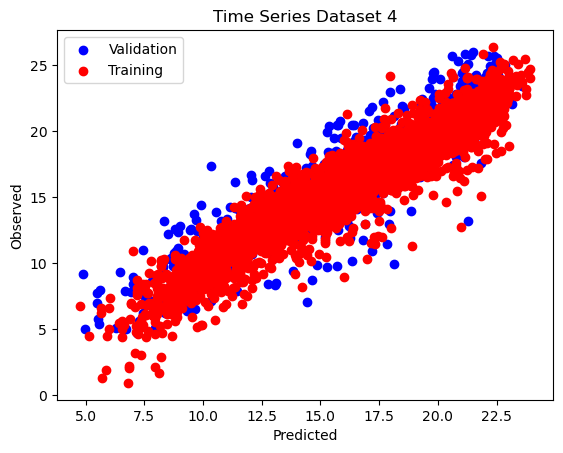

In [24]:
create_scatter_plot('Dataset 1', p_v_act_1, l_v_act_1, p_act_1, l_act_1)
create_scatter_plot('Dataset 2', p_v_act_2, l_v_act_2, p_act_2, l_act_2)
create_scatter_plot('Dataset 3', p_v_act_3, l_v_act_3, p_act_3, l_act_3)
create_scatter_plot('Dataset 4', p_v_act_4, l_v_act_4, p_act_4, l_act_4)
create_scatter_plot('Dataset 5', p_v_act_5, l_v_act_5, p_act_5, l_act_5)
create_scatter_plot('Dataset 6', p_v_act_6, l_v_act_6, p_act_6, l_act_6)
create_scatter_plot('Dataset 7', p_v_act_7, l_v_act_7, p_act_7, l_act_7)
create_scatter_plot('Dataset 8', p_v_act_8, l_v_act_8, p_act_8, l_act_8)
create_scatter_plot('Dataset 9', p_v_act_9, l_v_act_9, p_act_9, l_act_9)

create_scatter_plot('Time Series Dataset 1', p_v_act_1_ts, l_v_act_1_ts, p_act_1_ts, l_act_1_ts)
create_scatter_plot('Time Series Dataset 2', p_v_act_2_ts, l_v_act_2_ts, p_act_2_ts, l_act_2_ts)
create_scatter_plot('Time Series Dataset 3', p_v_act_3_ts, l_v_act_3_ts, p_act_3_ts, l_act_3_ts)
create_scatter_plot('Time Series Dataset 4', p_v_act_4_ts, l_v_act_4_ts, p_act_4_ts, l_act_4_ts)


In [25]:
# loop through datasets 1-9
for i in range(1, 10):
    l_act = globals()["l_act_" + str(i)]
    p_act = globals()["p_act_" + str(i)]
    l_v_act = globals()["l_v_act_" + str(i)]
    p_v_act = globals()["p_v_act_" + str(i)]
    print_error_metrics(i, l_act, p_act, l_v_act, p_v_act)

# loop through time series datasets 1-4
for i in range(1, 5):
    ts_l_act = globals()["l_act_" + str(i) + "_ts"]
    ts_p_act = globals()["p_act_" + str(i) + "_ts"]
    ts_l_v_act = globals()["l_v_act_" + str(i) + "_ts"]
    ts_p_v_act = globals()["p_v_act_" + str(i) + "_ts"]
    print("TIME SERIES DATASET", i)
    print_error_metrics(i, ts_l_act, ts_p_act, ts_l_v_act, ts_p_v_act)


DATASET 1
Mean Squared Error for Training Dataset 1 : 2.446746971348531
Mean Absolute Error for Training Dataset 1 : 1.1708105330308927
Mean Squared Error for Validation Dataset 1 : 3.1798956662267472
Mean Absolute Error for Validation Dataset 1 : 1.2988007438554992
 
DATASET 2
Mean Squared Error for Training Dataset 2 : 2.287998259446574
Mean Absolute Error for Training Dataset 2 : 1.1340975383330496
Mean Squared Error for Validation Dataset 2 : 3.1543489056868097
Mean Absolute Error for Validation Dataset 2 : 1.3704359724215007
 
DATASET 3
Mean Squared Error for Training Dataset 3 : 2.511793848554445
Mean Absolute Error for Training Dataset 3 : 1.1779836813972817
Mean Squared Error for Validation Dataset 3 : 2.6184633252135234
Mean Absolute Error for Validation Dataset 3 : 1.2624435083436234
 
DATASET 4
Mean Squared Error for Training Dataset 4 : 3.205889787791996
Mean Absolute Error for Training Dataset 4 : 1.36924636806505
Mean Squared Error for Validation Dataset 4 : 2.43638688585